# Introduction to SciPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import scipy

## Linear algebra

In [2]:
import scipy.linalg

### Matrix inverse

In [3]:
### Matrix Inverse ###

A = np.array([[1, 2], [3, 4]])
A_inv = scipy.linalg.inv(A)

### Error
np.sum(
    np.abs(A.dot(A_inv) - np.identity(2))
)

1.3322676295501878e-15

### Solving linear system

$A x = b$

$x^* = A^{-1} b$

In [4]:
### A x = b ###

A = np.array([[1, 2], [3, 4]])
b = np.array([1, 3])

x = scipy.linalg.inv(A).dot(b)

### Error

np.sum(np.abs(A.dot(x) - b))

4.4408920985006262e-16

### Pseudo-inverse and least squares

In [5]:
import scipy.special

xs = np.linspace(0, 1, 50)
signal = scipy.special.jv(0.0, xs * 20)
ys = signal + np.random.standard_normal(size=xs.shape[0]) * 0.1

/home/max/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


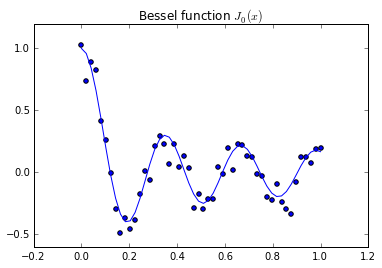

In [6]:
plt.scatter(xs, ys)
plt.plot(xs, signal)
plt.title("Bessel function $J_0(x)$")

Using cos-basis we can approximate data:

$A_{ij} = f_j(x_i) $

where:

$f_j(x) = \cos(j x)$

The solution is well know least square regression:
```
scipy.linalg.lstsq
```

In [7]:
def approximate_cos_basis(xs, ys, k = 5):
    js = np.arange(k)
    A = np.cos(np.outer(xs, js))
    c, resid, rank, sigma = scipy.linalg.lstsq(A, ys)
    approximated = A.dot(c).T 
    return approximated

In [8]:
c = approximate_cos_basis(xs, ys)

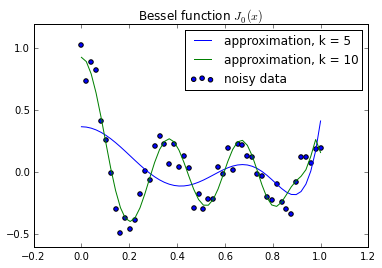

In [9]:
plt.scatter(xs, ys, label="noisy data")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 5), label="approximation, k = 5")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 10), label="approximation, k = 10")
plt.legend()
plt.title("Bessel function $J_0(x)$")

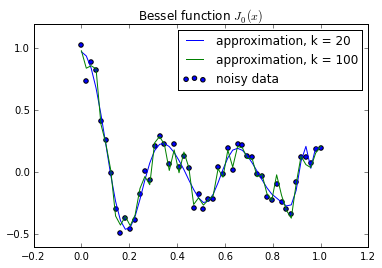

In [10]:
plt.scatter(xs, ys, label="noisy data")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 20), label="approximation, k = 20")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 100), label="approximation, k = 100")
plt.legend()
plt.title("Bessel function $J_0(x)$")

### Matrix decomposition

In [11]:
import scipy.stats

m = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.7], [0.7, 1.0]])

data = scipy.stats.multivariate_normal(m, cov).rvs(size=500)
xs, ys = np.meshgrid(
    np.linspace(data[:, 0].min(), data[:, 0].max(), 100),
    np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
)

pdf = scipy.stats.multivariate_normal(m, cov).pdf(np.dstack([xs, ys]))

/home/max/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<matplotlib.contour.QuadContourSet instance at 0x7fefd00b50e0>

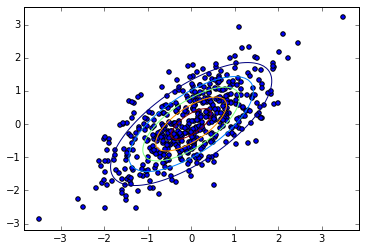

In [12]:
plt.scatter(data[:, 0], data[:, 1])
plt.contour(xs, ys, pdf, 5)

### PCA via Eigen-decomposition

In [13]:
l, V = scipy.linalg.eig(data.T.dot(data))
V

array([[-0.71953998, -0.69445101],
       [ 0.69445101, -0.71953998]])

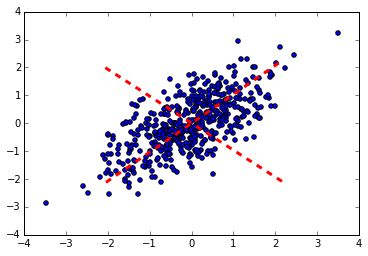

In [14]:
plt.scatter(data[:, 0], data[:, 1])
v = V * 3
plt.plot([-v[0, 0], v[0, 0]], [-v[1, 0], v[1, 0]], "--", color="red", linewidth=3)
plt.plot([-v[0, 1], v[0, 1]], [-v[1, 1], v[1, 1]], "--", color="red", linewidth=3)

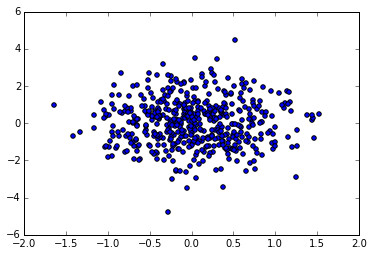

In [15]:
data_ = data.dot(V)

plt.scatter(data_[:, 0], data_[:, 1])

<matplotlib.contour.QuadContourSet instance at 0x7fefcd82ee18>

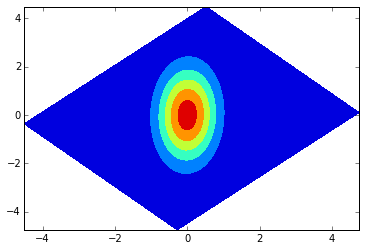

In [16]:
@np.vectorize
def rotate(x, y):
    r = np.array([x, y]).dot(V)
    return r[0], r[1]

xs_, ys_ = rotate(xs, ys)

plt.contourf(xs_, ys_, pdf, 5)

### PCA via SVD

In [17]:
U, s, Vh = scipy.linalg.svd(data)

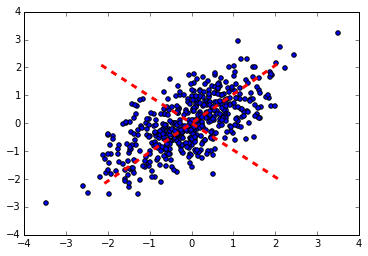

In [18]:
plt.scatter(data[:, 0], data[:, 1])
v = Vh * 3
plt.plot([-v[0, 0], v[0, 0]], [-v[1, 0], v[1, 0]], "--", color="red", linewidth=3)
plt.plot([-v[0, 1], v[0, 1]], [-v[1, 1], v[1, 1]], "--", color="red", linewidth=3)

## Optimization

In [19]:
import scipy.optimize

In [20]:
xs = np.random.gamma(shape=1.5, scale=0.8, size=150)

In [21]:
def neg_log_likelihood(params):
    from scipy.special import gamma
    shape, scale = params
    log_p = (shape - 1) * np.log(xs) - xs / scale - shape * np.log(scale) - np.log(gamma(shape)) 
    return -np.sum(log_p)

In [22]:
opt = scipy.optimize.minimize(neg_log_likelihood, x0=[1.0, 1.0], bounds=[(0.1, None), (0.1, None)], tol=1.0e-6)
opt.x

array([ 1.28327984,  0.8447144 ])

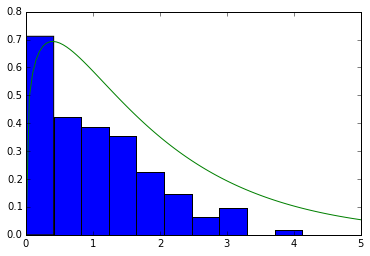

In [23]:
plt.hist(xs, bins=10, normed=True)
plt.plot(np.linspace(0, 5, 100), scipy.stats.gamma(opt.x[0], scale=opt.x[1]).pdf(np.linspace(0, 3, 100)))

## Sparse matrices

In [24]:
import scipy.sparse

m = scipy.stats.poisson(1.0).rvs(size=(100, 100))
m[m < 4]= 0

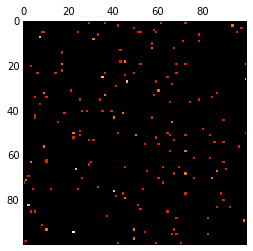

In [25]:
plt.matshow(m,cmap=plt.cm.gist_heat)

In [26]:
m_ = scipy.sparse.csc_matrix(m)
print m_

  (72, 0)	4
  (98, 0)	4
  (99, 0)	4
  (71, 1)	5
  (98, 1)	4
  (69, 2)	4
  (82, 2)	6
  (20, 3)	4
  (63, 3)	5
  (85, 3)	4
  (75, 4)	4
  (34, 5)	4
  (42, 5)	4
  (43, 5)	4
  (85, 5)	4
  (23, 6)	4
  (7, 7)	6
  (37, 7)	4
  (5, 8)	4
  (91, 8)	4
  (5, 9)	4
  (32, 9)	5
  (56, 9)	5
  (34, 10)	4
  (62, 10)	4
  :	:
  (95, 82)	4
  (51, 83)	4
  (61, 83)	4
  (34, 84)	4
  (70, 84)	5
  (54, 85)	4
  (0, 86)	4
  (32, 86)	4
  (67, 86)	5
  (83, 86)	4
  (77, 88)	4
  (44, 89)	4
  (54, 89)	4
  (63, 89)	4
  (80, 89)	4
  (66, 90)	4
  (83, 92)	4
  (2, 93)	5
  (5, 95)	4
  (56, 96)	4
  (3, 97)	4
  (89, 98)	5
  (19, 99)	5
  (26, 99)	6
  (50, 99)	4


## Statistics

#### Distributions

In [27]:
dist = scipy.stats.erlang(2.0)

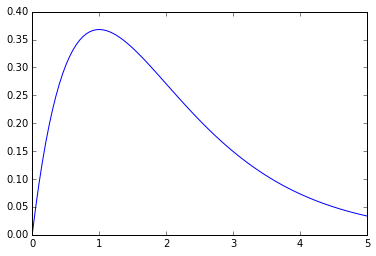

In [28]:
xs = np.linspace(0, 5, 100)
pdf = dist.pdf(xs)

plt.plot(xs, pdf)

In [29]:
samples = dist.rvs(size=100)

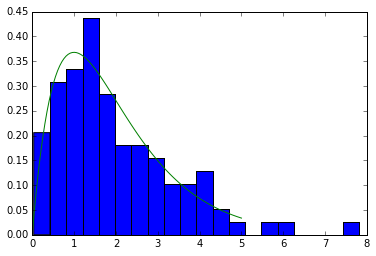

In [30]:
plt.hist(samples, bins=20, normed=True)
plt.plot(xs, pdf)

In [31]:
scipy.stats.kstest(samples, dist.cdf)

KstestResult(statistic=0.044961474254464173, pvalue=0.98753076339486034)

<Container object of 6 artists>

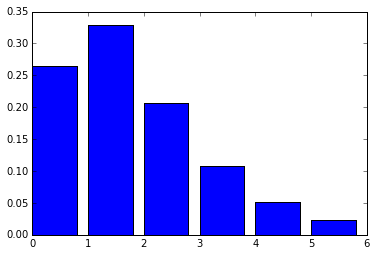

In [32]:
ps = dist.cdf(np.arange(1, 7)) - dist.cdf(np.arange(0, 6))
plt.bar(np.arange(0, 6), ps)

In [33]:
freq_, _ = np.histogram(samples, np.arange(0,7))
freq = freq_ / freq_.sum()

In [34]:
scipy.stats.chisquare(freq, ps)

Power_divergenceResult(statistic=0.98264873476333547, pvalue=0.96395309615378966)

### Example

In [35]:
def image_line(profile, size=(28, 28)):
    def f(angle, x_0):
        xs, ys = np.meshgrid(np.arange(size[0]), np.arange(size[1]))
        xs_ = xs.reshape(size[0] * size[1])
        ys_ = ys.reshape(size[0] * size[1])
    
        p = np.vstack([xs_ - x_0, ys_])
        n = np.array([[ np.cos(angle), np.sin(angle) ]]).T
        
        a = p.T.dot(n)

        projection = p.copy()
        projection[0, :] = n[0] * a.T
        projection[1, :] = n[1] * a.T

        deltas = np.linalg.norm(projection - p, axis = 0)
        return profile(deltas)
        
    return f

In [36]:
def gaussian_profile(d):
    return lambda x: np.exp(- np.square(x) / d / d)

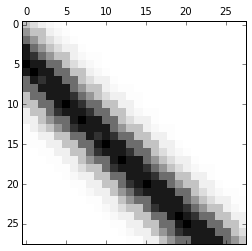

In [51]:
i = image_line(gaussian_profile(3))(np.pi / 4, -5)
plt.matshow(i.reshape((28, 28)), cmap=plt.cm.gist_gray_r)

In [45]:
def is_one(x, line_width=3):
    def error(params):
        angle, offset = params
        example = image_line(gaussian_profile(line_width))(angle, offset)
        return np.mean(np.square(example - x))
        
    opt = scipy.optimize.minimize(error, x0=[np.pi / 2, 0])
    return 1.0 - opt.fun

In [39]:
mnist = np.genfromtxt("../data/mnist_train.csv", delimiter=",", skip_header=1)

In [46]:
X = mnist[:, 1:] / 255.0
y = mnist[:, 0]

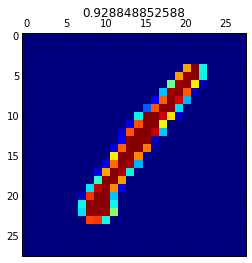

In [47]:
e0 = is_one(X[0, :])
plt.matshow(X[0, :].reshape(28, 28))
plt.title(e0)

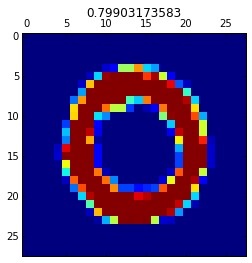

In [48]:
e1 = is_one(X[1, :])
plt.matshow(X[1, :].reshape(28, 28))
plt.title(e1)

In [49]:
N = 200

predict = np.ndarray(shape=N)

for i in range(N):
    predict[i] = is_one(X[i, :])

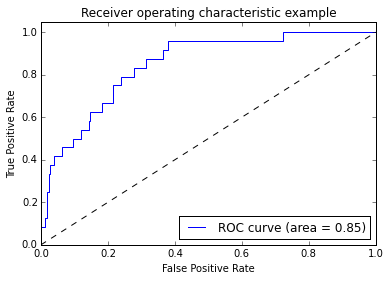

In [50]:
from sklearn.metrics import roc_curve, auc

labels = y[:N].copy()
labels[y[:N] == 1] = 1
labels[y[:N] != 1] = 0

fpr, tpr, _ = roc_curve(labels, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Excercises

- plot approximation error (vs true signal and vs data) depending on k (which k should be used given only noisy data?)
- make polynomial approximation
- load MNIST dataset
- find the best 2D linear subspace for MNIST dataset
- plot projected objects with labels
- plot pixel correlation matrix for some class
- *find the best hyper-plane for separation each class from the rest (advanced)*